In [2]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore", message=".*specific warning message.*")
plt.rcParams['font.family'] = 'DejaVu Sans' 


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top5000youtubechannels/top-5000-youtube-channels.csv


## **LOADING THE DATASET**

In [3]:
df=pd.read_csv('/kaggle/input/top5000youtubechannels/top-5000-youtube-channels.csv')

## **OVERVIEW OF THE DATA**

In [4]:
df.head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757,18752951,20869786591
1,2nd,A++,T-Series,12661,61196302,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4th,A++,SET India,27323,31180559,22675948293
4,5th,A++,WWE,36756,32852346,26273668433


In [5]:
df.sample(5)

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
4137,"4,138th",B+,MEGWIN TV,4869,1158868,923484591
2256,"2,257th",B+,Hip Hop/R&B Lyrics,1238,706774,455244290
3904,"3,905th",B+,MarcusMartinusVEVO,33,1671222,669261590
3074,"3,075th",B+,Boom Slime,119,218329,53161626
2903,"2,904th",B+,ToyKids,707,1559949,440314641


In [6]:
df.shape

(5000, 6)

In [7]:
print('The no of rows in the dataset are: ',df.shape[0])
print('The no of columns in the dataset are: ',df.shape[1])


The no of rows in the dataset are:  5000
The no of columns in the dataset are:  6


In [8]:
df.columns

Index(['Rank', 'Grade', 'Channel name', 'Video Uploads', 'Subscribers',
       'Video views'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rank           5000 non-null   object
 1   Grade          5000 non-null   object
 2   Channel name   5000 non-null   object
 3   Video Uploads  5000 non-null   object
 4   Subscribers    5000 non-null   object
 5   Video views    5000 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 234.5+ KB


In [10]:
df.dtypes

Rank             object
Grade            object
Channel name     object
Video Uploads    object
Subscribers      object
Video views       int64
dtype: object

## **DATA CLEANING**

In [11]:
df=df.replace('--',np.nan,regex=True)

In [12]:
df.isnull().sum()

Rank               0
Grade              0
Channel name       0
Video Uploads      6
Subscribers      387
Video views        0
dtype: int64

In [13]:
per_missing=df.isnull().sum()*100/len(df)
per_missing

Rank             0.00
Grade            0.00
Channel name     0.00
Video Uploads    0.12
Subscribers      7.74
Video views      0.00
dtype: float64

In [14]:
df.dropna(axis=0,inplace=True)

In [15]:
df.tail()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
4995,"4,996th",B+,Uras Benlioğlu,706,2072942,441202795
4996,"4,997th",B+,HI-TECH MUSIC LTD,797,1055091,377331722
4997,"4,998th",B+,Mastersaint,110,3265735,311758426
4998,"4,999th",B+,Bruce McIntosh,3475,32990,14563764
4999,"5,000th",B+,SehatAQUA,254,21172,73312511


In [16]:
df.isnull().sum()

Rank             0
Grade            0
Channel name     0
Video Uploads    0
Subscribers      0
Video views      0
dtype: int64

In [17]:
pd.options.display.float_format = '{:.2f}'.format

In [18]:
df.describe()

,Video views
count,4610.00
mean,1138403081.18
std,2068705922.53
min,75.00
25%,218918407.50
50%,536888608.50
75%,1195114974.75
max,47548839843.00


In [19]:
df['Rank']=df['Rank'].str[0:-2]

In [20]:
df['Rank']=df['Rank'].str.replace(',','').astype(int)

In [21]:
df.sample(5)

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
2868,2869,B+,BabyKVEVO,19,834244,573934391
2711,2712,B+,SeseGel,1317,1708062,601556169
3108,3109,B+,Hari Sharma,14396,178297,107169694
2584,2585,B+,EllieGouldingVEVO,97,8145497,4355601745
2617,2618,B+,AmyWinehouseVEVO,28,1484286,1122176667


In [22]:
df.duplicated().sum()

0

In [23]:
df['Video Uploads']=df['Video Uploads'].astype(int)

In [24]:
df['Subscribers']=df['Subscribers'].astype(int)

In [25]:
df['Grade'].unique()

array(['A++ ', 'A+ ', 'A ', 'A- ', 'B+ '], dtype=object)

In [26]:
df['Grade'].astype(object)

0       A++ 
1       A++ 
2       A++ 
3       A++ 
4       A++ 
        ... 
4995     B+ 
4996     B+ 
4997     B+ 
4998     B+ 
4999     B+ 
Name: Grade, Length: 4610, dtype: object

In [27]:

df['New_Grade'] = df['Grade'].str.strip().map({'A++': 5, 'A+': 4, 'A': 3, 'A-': 2, 'B+': 1})



In [28]:
df['Grade'].unique()

array(['A++ ', 'A+ ', 'A ', 'A- ', 'B+ '], dtype=object)

In [29]:
df['New_Grade'].unique()

array([5, 4, 3, 2, 1])

In [30]:
df['New_Grade'].dtype

dtype('int64')

In [31]:
df.dtypes

Rank              int64
Grade            object
Channel name     object
Video Uploads     int64
Subscribers       int64
Video views       int64
New_Grade         int64
dtype: object

In [34]:
## AVERAGE VIEWS OF EACH CHANNEL
df['Average_Views']=df['Video views']/df['Video Uploads']

## **DISTRIBUTION OF DATA**

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

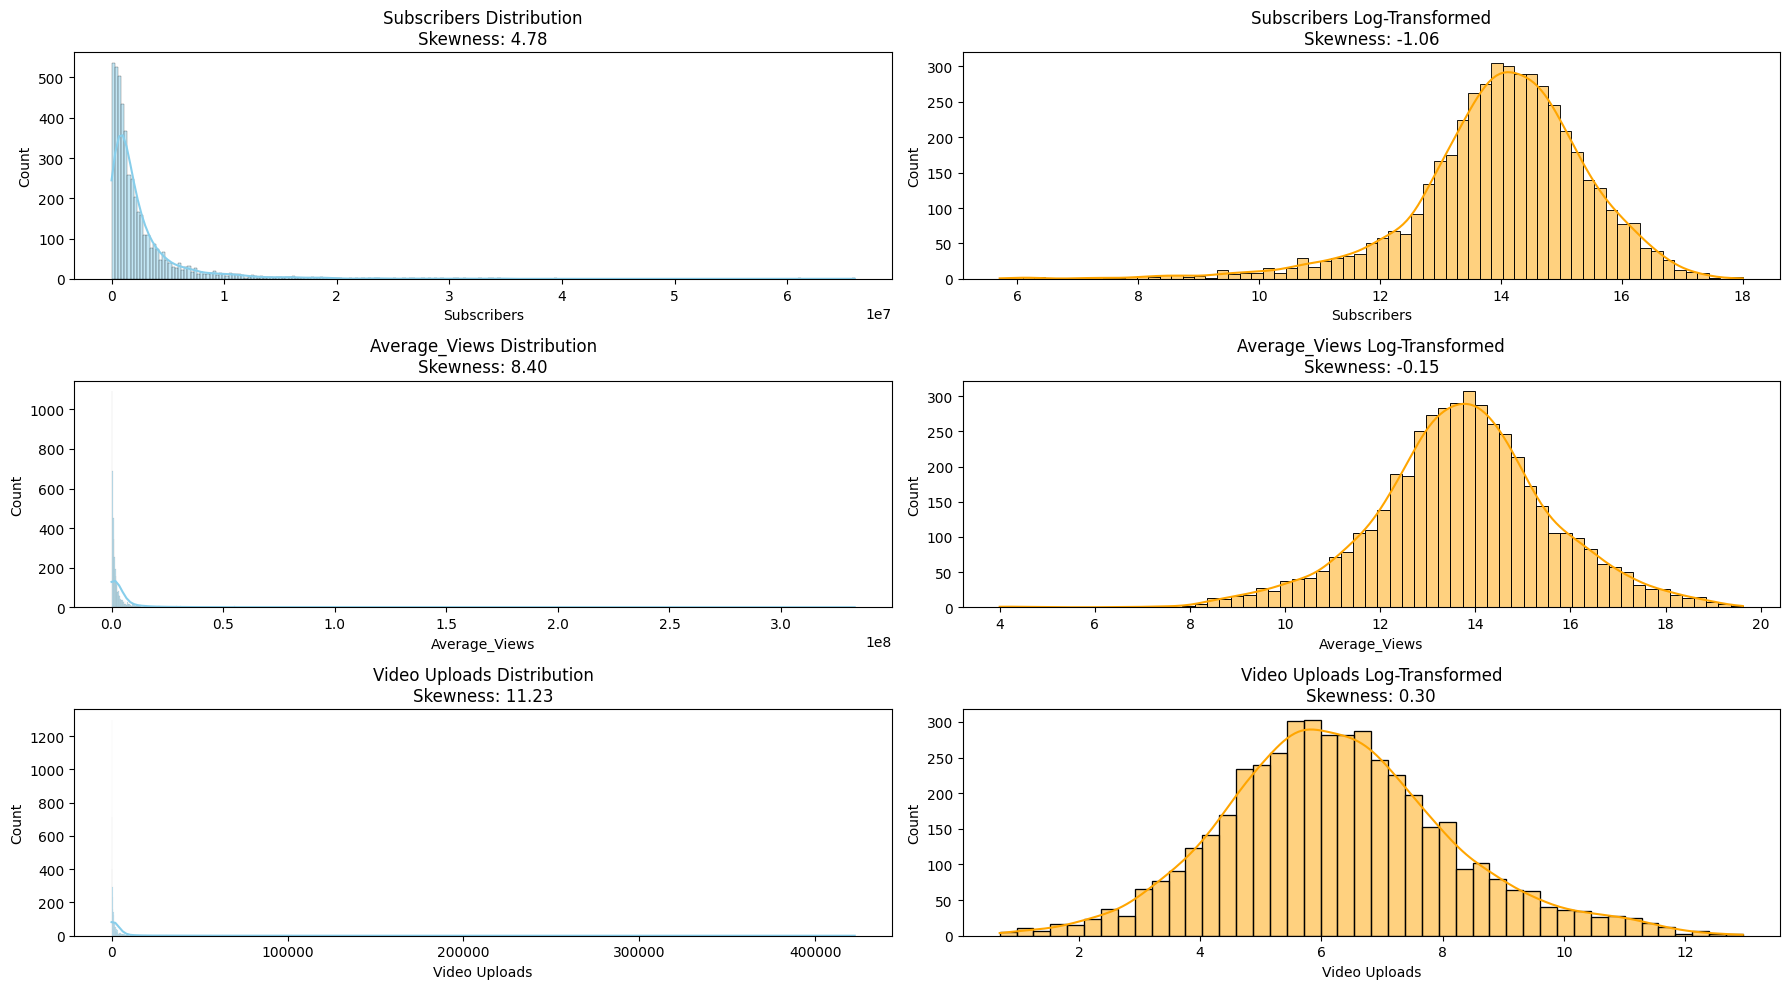

In [61]:

from scipy.stats import skew

# Columns to analyze
cols = ['Subscribers', 'Average_Views', 'Video Uploads']

plt.figure(figsize=(18, 10))

for i, col in enumerate(cols, 1):
    # Original Distribution
    plt.subplot(3, 2, 2*i - 1)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f"{col} Distribution\nSkewness: {skew(df[col].dropna()):.2f}")

    # Log Transformation (handle zeros by adding 1)
    plt.subplot(3, 2, 2*i)
    log_data = np.log1p(df[col])  # log1p = log(x+1)
    sns.histplot(log_data, kde=True, color='orange')
    plt.title(f"{col} Log-Transformed\nSkewness: {skew(log_data.dropna()):.2f}")

plt.tight_layout()
plt.show()


## **DATA ANALYSIS**

In [35]:
df.head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views,New_Grade,Average_Views
0,1,A++,Zee TV,82757,18752951,20869786591,5,252181.53
1,2,A++,T-Series,12661,61196302,47548839843,5,3755535.89
2,3,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082,5,26255509.60
3,4,A++,SET India,27323,31180559,22675948293,5,829921.62
4,5,A++,WWE,36756,32852346,26273668433,5,714813.05


In [36]:
## WHICH CHANNEL HAS THE HIGHEST AVERAGE VIEWS??
df[df['Average_Views']==df['Average_Views'].max()]['Channel name']

628    cocoz toon
Name: Channel name, dtype: object

In [37]:
df.sort_values(by='Average_Views',ascending=False)

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views,New_Grade,Average_Views
628,629,A,cocoz toon,1,2162992,333012122,3,333012122.00
314,315,A,icanrockyourworld,8,3891968,2420286079,3,302535759.88
613,614,A,AdeleVEVO,31,16270830,7414111263,3,239164879.45
389,390,A,Bad Bunny,11,12685253,2612504875,3,237500443.18
1120,1121,A-,Danny Ocean,8,2861917,1690503137,2,211312892.12
...,...,...,...,...,...,...,...,...
1350,1351,A-,GumTea TV,14,114244,9495,2,678.21
4583,4584,B+,Various Artists - Topic,207072,30224,28670469,1,138.46
2404,2405,B+,ItsHARSH007 Gaming,1,23499,75,1,75.00
3216,3217,B+,Various Artists - Topic,203934,26013,13049365,1,63.99


In [38]:
## HOW MANY DISTINCT CHANNELS ARE THERE IN THE DATASET?
df['Channel name'].nunique()

4604

**There are 4604 distinct channels in the dataset.**

In [39]:
## WHICH ARE THE CHANNELS HAVING THE MOST NO OF VIDEO UPLOADS?
df.sort_values(by='Video Uploads',ascending=False).head(10)

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views,New_Grade,Average_Views
3453,3454,B+,AP Archive,422326,746325,548619569,1,1299.04
1149,1150,A-,YTN NEWS,355996,820108,1640347646,2,4607.77
2223,2224,B+,SBS Drama,335521,1418619,1565758044,1,4666.65
323,324,A,GMA News,269065,2599175,2786949164,3,10357.90
2956,2957,B+,MLB,267649,1434206,1329206392,1,4966.23
4112,4113,B+,民視綜合頻道,208265,383022,659944536,1,3168.77
4583,4584,B+,Various Artists - Topic,207072,30224,28670469,1,138.46
3216,3217,B+,Various Artists - Topic,203934,26013,13049365,1,63.99
1888,1889,A-,SBS Entertainment,200928,1809240,1477119313,2,7351.49
1378,1379,A-,東森新聞 CH51,188502,720563,1109957965,2,5888.31


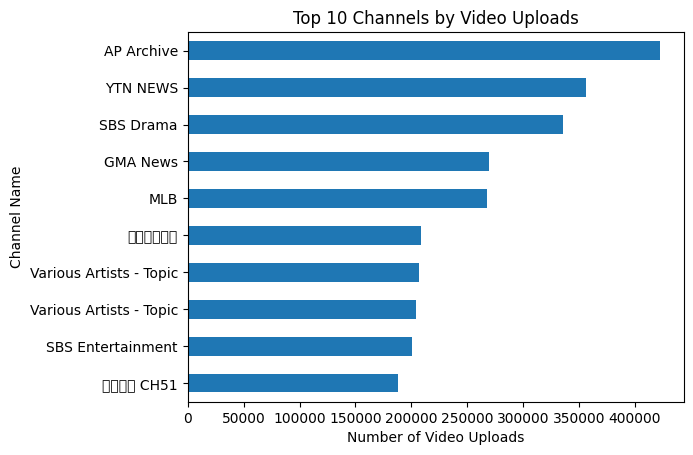

In [40]:
## DATA VISUALIZATION
warnings.filterwarnings('ignore', message='Glyph.*missing from current font')
top10 = df.sort_values(by='Video Uploads', ascending=False).head(10)

top10[::-1].plot(
    kind='barh',
    x='Channel name',
    y='Video Uploads',
    legend=False
)

plt.xlabel('Number of Video Uploads')
plt.ylabel('Channel Name')
plt.title('Top 10 Channels by Video Uploads')
plt.show()


**AP ARCHIVE HAS THE MOST NO OF VIDEO UPLOADS AMONG ALL CHANNELS**

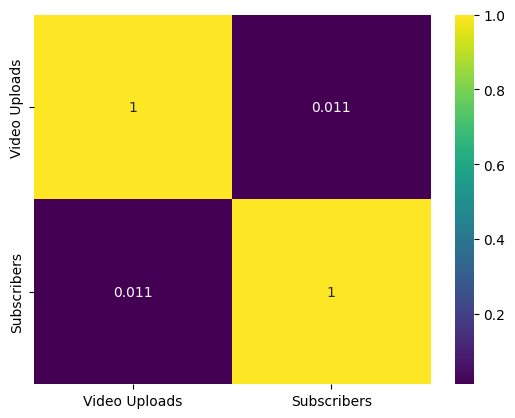

In [41]:
## IS IT TRUE THAT MORE NO OF VIDEO IMPLIES MORE NO OF SUBSCRIBERS
df_corr=df[['Video Uploads','Subscribers']].corr()
sns.heatmap(df_corr,annot=True,cmap='viridis')
plt.show()


**There isn't any correlation between the no of Subscribers and the no of Video Uploads which implies that more no of video uploads doesn't always add to the no of subscribers**

### **1. GRADE BASED ANALYSIS**

In [42]:
## HOW CHANNELS ARE DISTRIBUTED AMONG DIFFERENT GRADES?
df['Grade'].value_counts()

Grade
B+      2722
A-       941
A        897
A+        40
A++       10
Name: count, dtype: int64

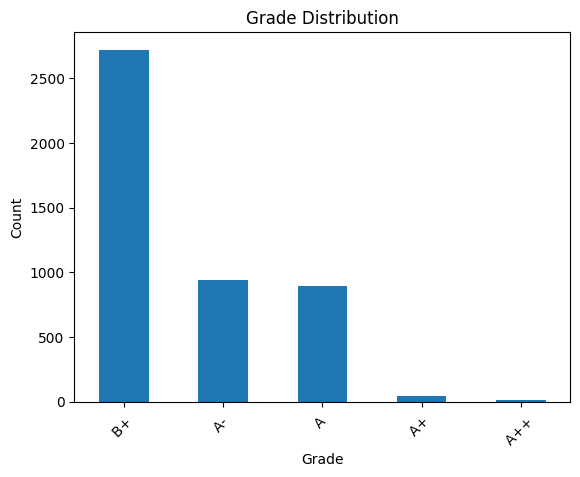

In [43]:
df['Grade'].value_counts().plot(kind='bar')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.title('Grade Distribution')
plt.xticks(rotation=45)
plt.show()


 **Maximum channels are in the grade category : B+(1)** 

In [44]:
## Which Grade Has the Maximum Number of Video Uploads?
df.groupby('Grade')['Video Uploads'].mean().reset_index().sort_values(by='Video Uploads',ascending=False)

,Grade,Video Uploads
2,A++,37450.70
1,A+,16960.30
0,A,5709.86
3,A-,4382.58
4,B+,3136.16


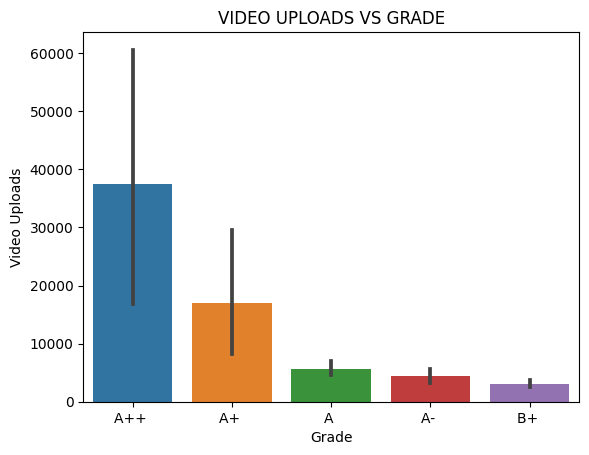

In [45]:
sns.barplot(data=df,x='Grade',y='Video Uploads',estimator='mean')
plt.title('VIDEO UPLOADS VS GRADE')
plt.show()

**Grade A++ has the maximum no of video uploads estimated by average**

In [46]:
df.columns

Index(['Rank', 'Grade', 'Channel name', 'Video Uploads', 'Subscribers',
       'Video views', 'New_Grade', 'Average_Views'],
      dtype='object')

In [47]:
## Which Grade Has The Highest Average Views?
df_1=df.groupby('Grade')['Average_Views'].mean().reset_index().sort_values(by='Average_Views',ascending=False)
df_1

,Grade,Average_Views
1,A+,11577080.32
0,A,10540908.45
2,A++,5688267.96
3,A-,5254804.04
4,B+,3280380.88


Text(0.5, 1.0, 'Average Views by Grade')

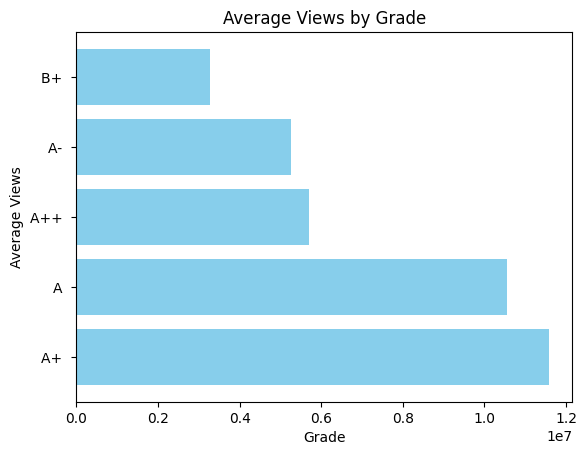

In [48]:
plt.barh(df_1['Grade'], df_1['Average_Views'], color='skyblue')

# Labels & title
plt.xlabel('Grade')
plt.ylabel('Average Views')
plt.title('Average Views by Grade')



**Grade A+ has the highest average views**

In [49]:
## WHICH GRADE HAS THE MAXIMUM NO OF SUBSCRIBERS?
df.groupby('Grade')['Subscribers'].mean().reset_index().sort_values(by='Subscribers',ascending=False)

,Grade,Subscribers
2,A++,22281762.50
1,A+,11726947.47
0,A,5107136.29
3,A-,2798520.38
4,B+,1535207.95


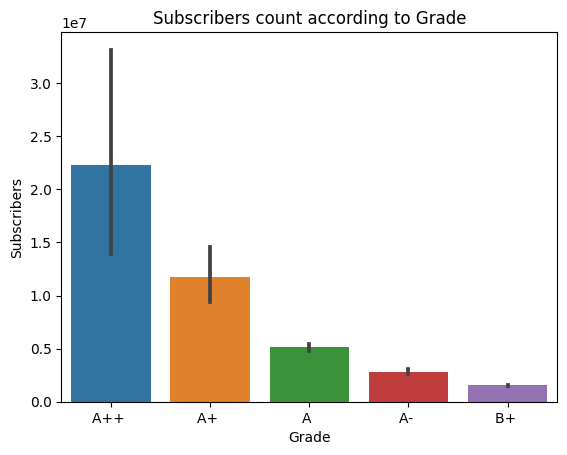

In [50]:
sns.barplot(x='Grade',y='Subscribers',data=df,estimator='mean')
plt.title('Subscribers count according to Grade')
plt.show()

**The A++ grade category has the most no of subscribers.**
1. The grade category is based on the number of subscribers, the channels having the most no subscribers are in grade A++ , then  A+, A and so on.
2. Most no of channels belong to the grade B+ category.


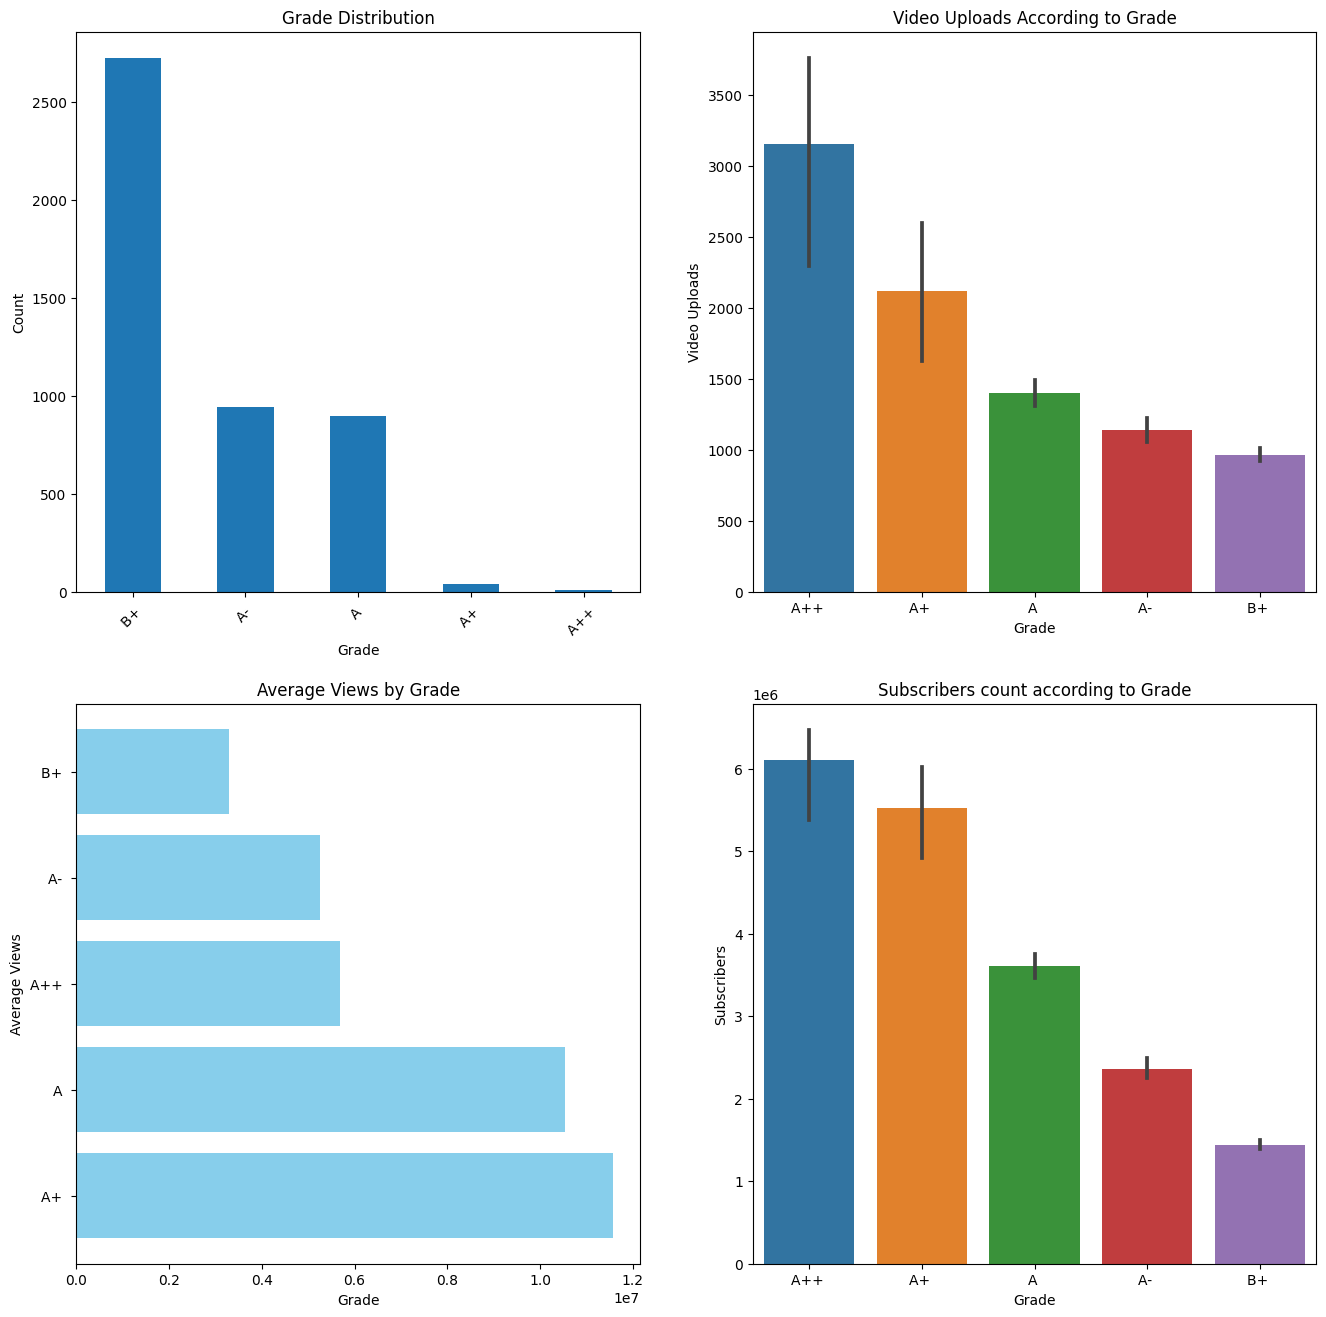

In [75]:
## ALL GRAPHS IN ONE FRAME
plt.figure(figsize=(16,16))
plt.subplot(2,2,1)
df['Grade'].value_counts().plot(kind='bar')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.title('Grade Distribution')
plt.xticks(rotation=45)
plt.subplot(2,2,2)
sns.barplot(data=df,x='Grade',y='Video Uploads',estimator='mean')
plt.title('Video Uploads According to Grade')
plt.subplot(2,2,3)
plt.barh(df_1['Grade'], df_1['Average_Views'], color='skyblue')
plt.xlabel('Grade')
plt.ylabel('Average Views')
plt.title('Average Views by Grade')
plt.subplot(2,2,4)
sns.barplot(x='Grade',y='Subscribers',data=df,estimator='mean')
plt.title('Subscribers count according to Grade')
plt.show()


In [52]:
df.columns

Index(['Rank', 'Grade', 'Channel name', 'Video Uploads', 'Subscribers',
       'Video views', 'New_Grade', 'Average_Views'],
      dtype='object')

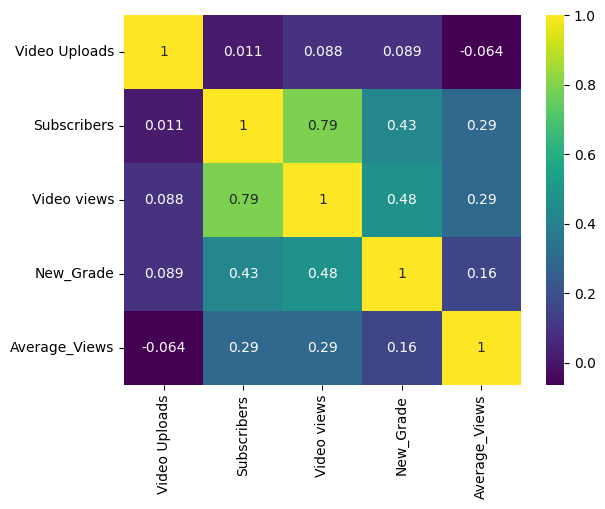

In [53]:
## CORREALATION MATRIX
df_corr1=df[['Video Uploads','Subscribers','Video views','New_Grade','Average_Views']].corr()
sns.heatmap(df_corr1,annot=True,cmap='viridis')
plt.title('Correlation Matrix heatmap')
plt.show()

**There is a strong positive correlation between the no of video views and the no of subscribers.**
* It indicates that more no of subscribers implies more no of views and vice versa.
* There is a moderate positive correlation between Video Views and Grade.
* Channels belonging to higher grade are more likely to have higher reviews.

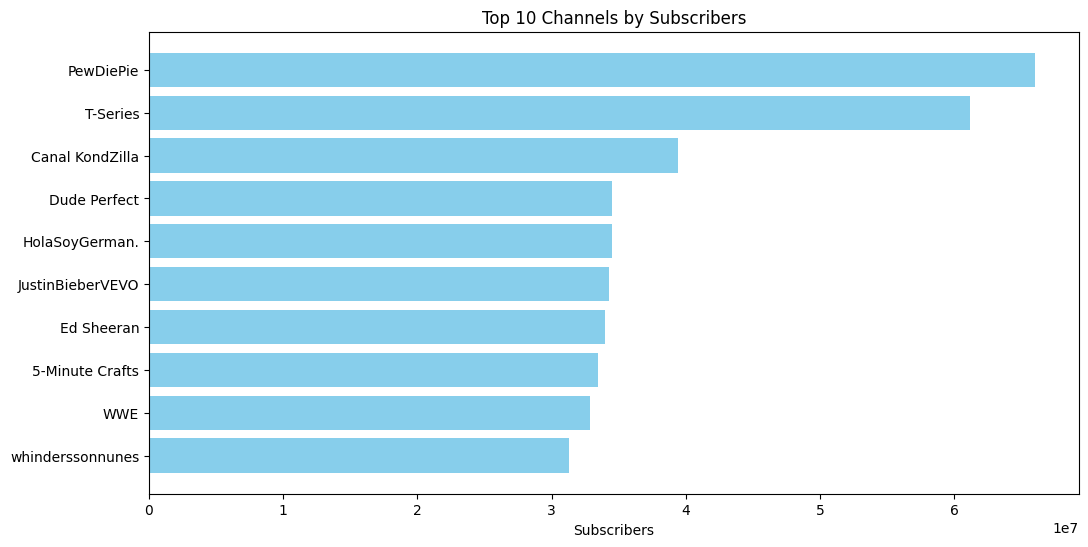

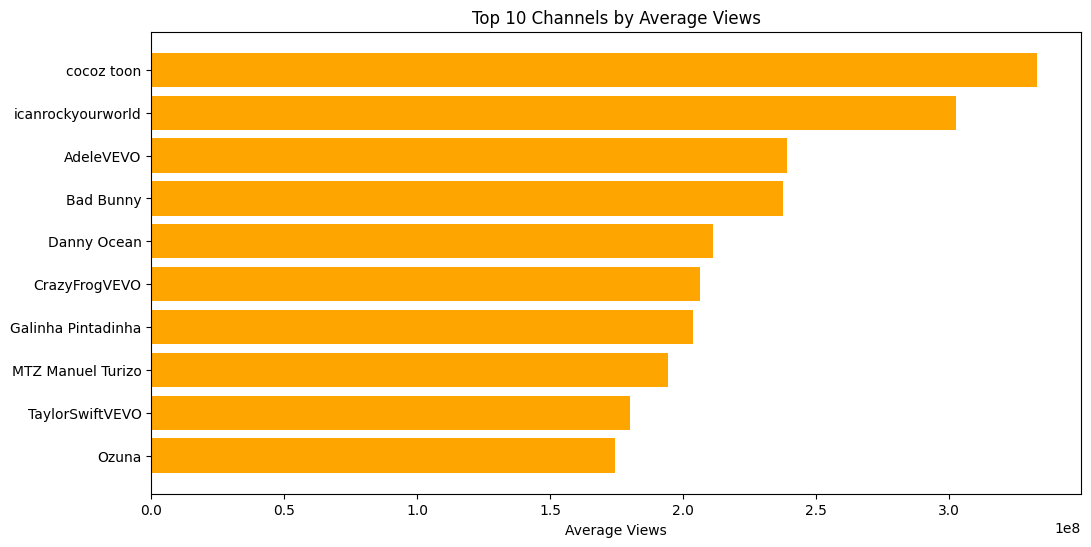

In [54]:
## TOP 10 CHANNEL ANALYSIS
## 1. BY SUBSCRIBERS
top_n = 10
top_subs = df.nlargest(top_n, 'Subscribers')
plt.figure(figsize=(12,6))
plt.barh(top_subs['Channel name'], top_subs['Subscribers'], color='skyblue')
plt.gca().invert_yaxis()
plt.title(f"Top {top_n} Channels by Subscribers")
plt.xlabel("Subscribers")
plt.show()

## 2. BY VIEWS
top_views = df.nlargest(top_n, 'Average_Views')
plt.figure(figsize=(12,6))
plt.barh(top_views['Channel name'], top_views['Average_Views'], color='orange')
plt.gca().invert_yaxis()
plt.title(f"Top {top_n} Channels by Average Views")
plt.xlabel("Average Views")
plt.show()


<Figure size 1200x500 with 0 Axes>

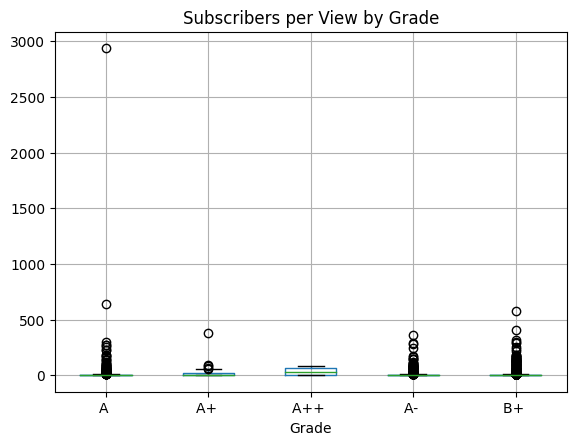

In [55]:
## ENGAGEMENT RATIO
## SUBS_PER_VIEW
plt.figure(figsize=(12,5))
df['Subs_per_View'] = df['Subscribers'] / df['Average_Views'].replace(0, np.nan)
df.boxplot(column='Subs_per_View', by='Grade')
plt.title("Subscribers per View by Grade")
plt.suptitle("")
plt.show()


In [70]:
# Sort by ratio in descending order
top_channels = df.sort_values(by='Subs_per_View', ascending=False)

# Display top 10 channels
top_channels[['Channel name', 'Subscribers', 'Average_Views', 'Subs_per_View']].head(10)


,Channel name,Subscribers,Average_Views,Subs_per_View
0,Zee TV,6462013.12,252181.53,9.41
2636,GrupoTelemicroHD,745770.00,53624.22,9.41
2702,Imagen Entretenimiento,1351336.00,22126.33,9.41
2696,قناة شعبيات / Sha3beyat…,2019713.00,159130.05,9.41
2694,OTV,818809.00,7910.21,9.41
655,ANTV - Truyền hình Công an…,1418544.00,51088.47,9.41
2667,Imagen Noticias,1445044.00,19339.86,9.41
658,National Geographic,6462013.12,296904.01,9.41
659,Telemundo Novelas,3640005.00,173868.53,9.41
2647,TmarTn2,3462611.00,136147.74,9.41


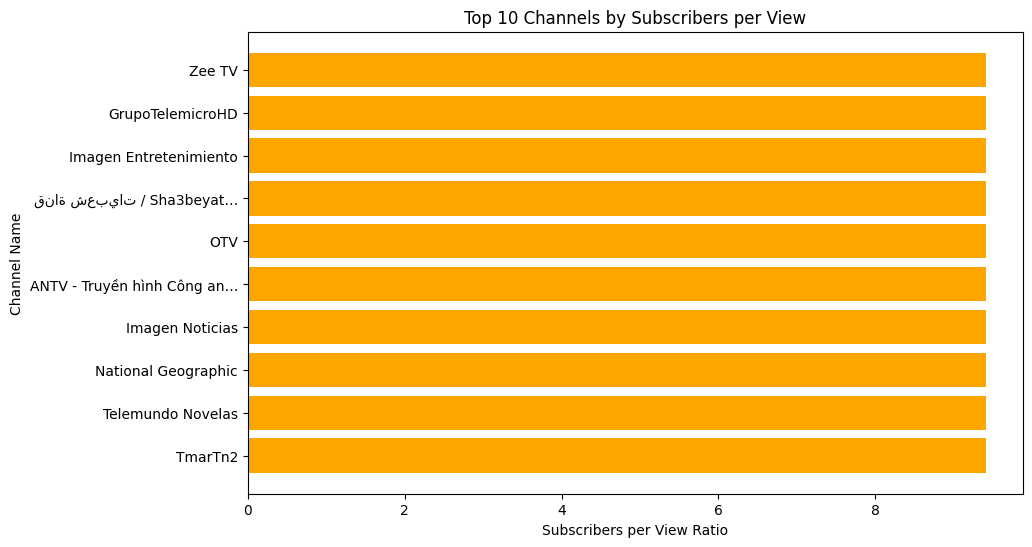

In [72]:
top_10 = top_channels.head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_10['Channel name'], top_10['Subs_per_View'], color='orange')
plt.xlabel("Subscribers per View Ratio")
plt.ylabel("Channel Name")
plt.title("Top 10 Channels by Subscribers per View")
plt.gca().invert_yaxis()
plt.show()

## **OUTLIER DETECTION**

In [62]:
df.columns

Index(['Rank', 'Grade', 'Channel name', 'Video Uploads', 'Subscribers',
       'Video views', 'New_Grade', 'Average_Views', 'Subs_per_View'],
      dtype='object')

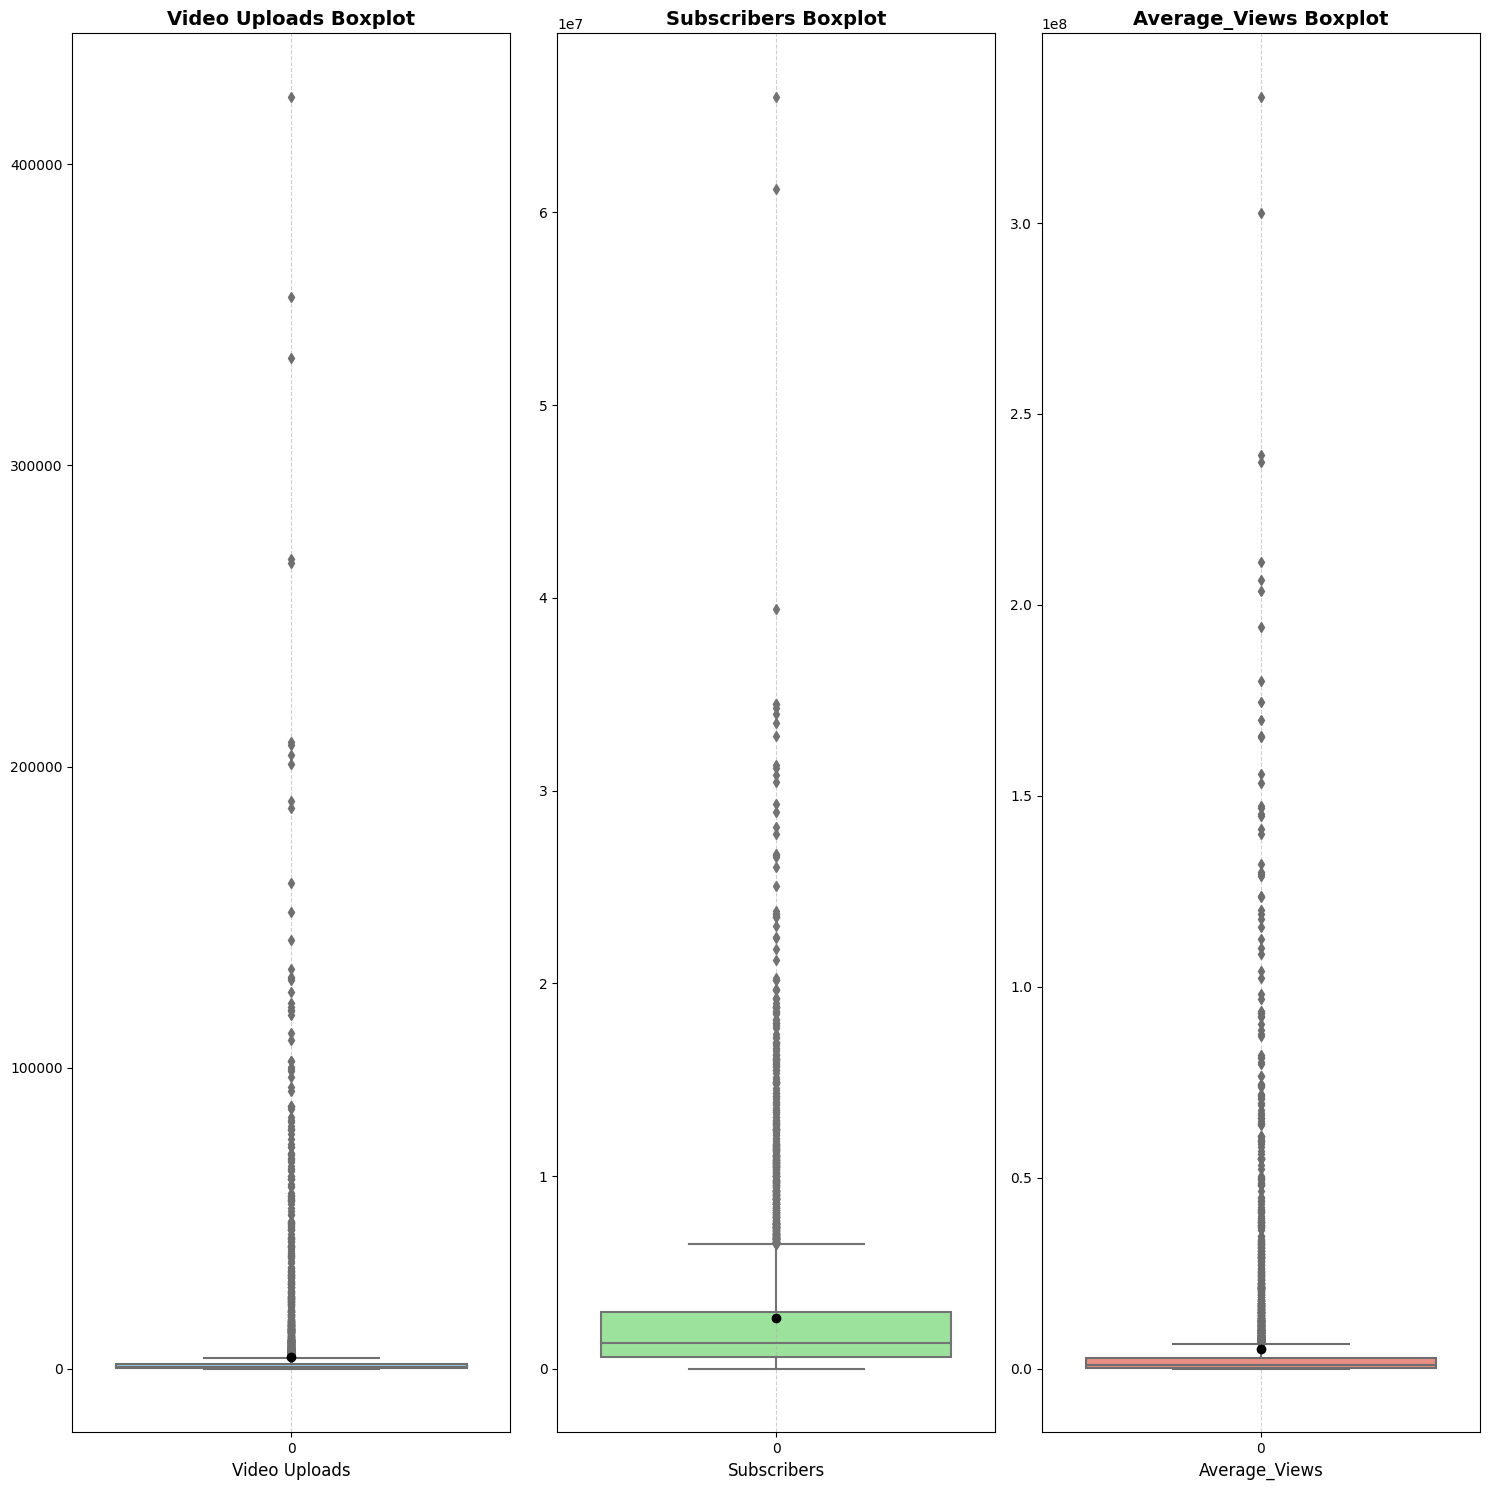

In [65]:
## BOX PLOTS TO VISUALIZE TREND OF OUTLIERS IN THE DATASET
cols=['Video Uploads','Subscribers','Average_Views']
colors = ['skyblue', 'lightgreen', 'salmon']
plt.figure(figsize=(15,15))

for i, col in enumerate(cols, 1):
    plt.subplot(1, 3, i )
    sns.boxplot(df[col],color=colors[i-1], 
        showmeans=True, 
        meanprops={"marker": "o",
                   "markerfacecolor": "black", 
                   "markeredgecolor": "black"})
    plt.title(f"{col} Boxplot", fontsize=14, fontweight='bold')
    plt.xlabel(col, fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

**There are a large no of outliers in the dataset.**

In [66]:
## OUTLIER REMOVAL
numerical_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]

# capping of each column
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    # Winsorization: clip values to lower/upper limit
    df[col] = np.where(df[col] < lower_limit, lower_limit, df[col])
    df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])

print("Outliers handled with Winsorization using IQR:")
print(df.head())  

Outliers handled with Winsorization using IQR:
   Rank Grade                Channel name  Video Uploads  Subscribers  \
0  1.00  A++                       Zee TV        3759.25   6462013.12   
1  2.00  A++                     T-Series        3759.25   6462013.12   
2  3.00  A++   Cocomelon - Nursery Rhymes         373.00   6462013.12   
3  4.00  A++                    SET India        3759.25   6462013.12   
4  5.00  A++                          WWE        3759.25   6462013.12   

    Video views  New_Grade  Average_Views  Subs_per_View  
0 2659409825.62       3.50      252181.53           9.41  
1 2659409825.62       3.50     3755535.89           9.41  
2 2659409825.62       3.50     6472287.49           0.73  
3 2659409825.62       3.50      829921.62           9.41  
4 2659409825.62       3.50      714813.05           9.41  


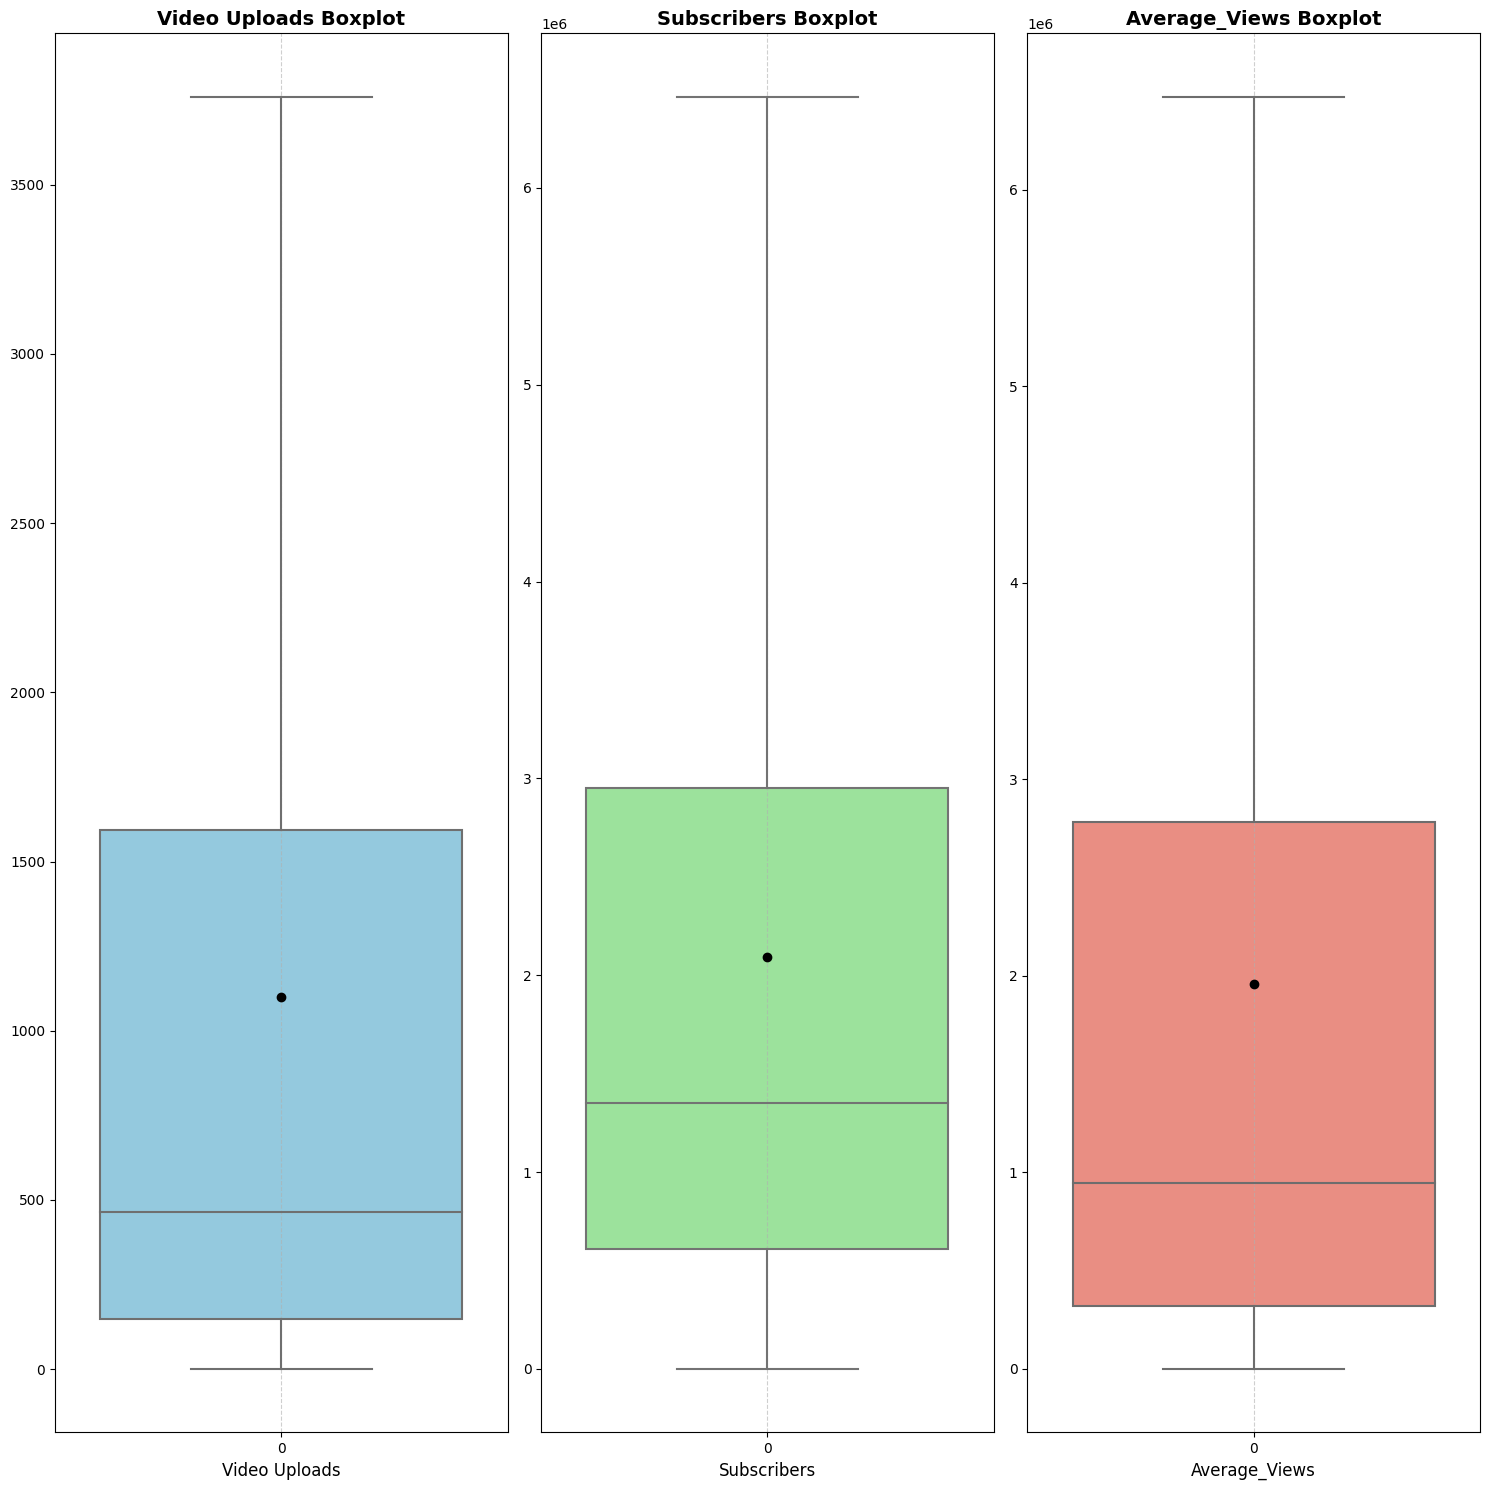

In [67]:
## BOX PLOT AFTER REMOVING OUTLIERS
cols=['Video Uploads','Subscribers','Average_Views']
colors = ['skyblue', 'lightgreen', 'salmon']
plt.figure(figsize=(15,15))

for i, col in enumerate(cols, 1):
    plt.subplot(1, 3, i )
    sns.boxplot(df[col],color=colors[i-1], 
        showmeans=True, 
        meanprops={"marker": "o",
                   "markerfacecolor": "black", 
                   "markeredgecolor": "black"})
    plt.title(f"{col} Boxplot", fontsize=14, fontweight='bold')
    plt.xlabel(col, fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

All the outliers are removed which can be clearly seen through the box plots.

## **CONCLUSION AND INSIGHTS**
### **SUBSCRIBERS AND VIDEO UPLOADS**
* More no of videos doesn't imply more no of subscribers.
* This shows that the quality of content is extremely crucial.
* To gain more subscribers more emphasis should be on content quality and not no of uploads.
### **GRADE WISE ANALYSIS**
* Grade A++ has the maximum no of video uploads estimated by average.
* Grade A+ has the highest average views.
* The A++ grade category has the most no of subscribers.
* Maximum channels are in the grade category : B+(1)
### **AVERAGE VIEWS AND SUBSCRIBERS**
* There is a strong positive correlation between the no of video views and the no of subscribers.
*  It indicates that more no of subscribers implies more no of views and vice versa.
* There is a moderate positive correlation between Video Views and Grade.
* Channels belonging to higher grade are more likely to have higher reviews.
### **SOME MORE INSIGHTS**
* AP Archive has the most no video uploads among all channels.
* cocoz toon channel has the highest no of average views.
* PewDiePie has the most no of subscribers.
* ZeeTv has the highest subscribers per view indicating most loyal fan base.